# pandas概览

Pandas 是 Python (opens new window)的核心数据分析支持库，提供了快速、灵活、明确的数据结构，旨在简单、直观地处理关系型、标记型数据。Pandas 的目标是成为 Python 数据分析实践与实战的必备高级工具，其长远目标是成为最强大、最灵活、可以支持任何语言的开源数据分析工具。经过多年不懈的努力，Pandas 离这个目标已经越来越近了。

Pandas 适用于处理以下类型的数据：

1. 与 SQL 或 Excel 表类似的，含异构列的表格数据;
2. 有序和无序（非固定频率）的时间序列数据;
3. 带行列标签的矩阵数据，包括同构或异构型数据;
4. 任意其它形式的观测、统计数据集, 数据转入 Pandas 数据结构时不必事先标记。

Pandas 的主要数据结构是 **Series** (opens new window)（一维数据）与 **DataFrame** (opens new window)（二维数据），这两种数据结构足以处理金融、统计、社会科学、工程等领域里的大多数典型用例。对于 R 用户，DataFrame 提供了比 R 语言 data.frame 更丰富的功能。Pandas 基于 NumPy (opens new window)开发，可以与其它第三方科学计算支持库完美集成。

Pandas 就像一把万能瑞士军刀，下面仅列出了它的部分优势 ：

1. 处理浮点与非浮点数据里的缺失数据，表示为 NaN；
2. 大小可变：插入或删除 DataFrame 等多维对象的列；
3.  自动、显式数据对齐：显式地将对象与一组标签对齐，也可以忽略标签，在 Series、DataFrame 计算时自动与数据对齐；
4. 强大、灵活的分组（group by）功能：拆分-应用-组合数据集，聚合、转换数据；
5. 把 Python 和 NumPy 数据结构里不规则、不同索引的数据轻松地转换为 DataFrame 对象；
6. 基于智能标签，对大型数据集进行切片、花式索引、子集分解等操作；
7. 直观地合并（merge）、**连接（join）**数据集；
8. 灵活地重塑（reshape）、**透视（pivot）**数据集；
9. 轴支持结构化标签：一个刻度支持多个标签；
10. 成熟的 IO 工具：读取文本文件（CSV 等支持分隔符的文件）、Excel 文件、数据库等来源的数据，利用超快的 HDF5 格式保存 / 加载数据；
11. 时间序列：支持日期范围生成、频率转换、移动窗口统计、移动窗口线性回归、日期位移等时间序列功能。

这些功能主要是为了解决其它编程语言、科研环境的痛点。处理数据一般分为几个阶段：数据整理与清洗、数据分析与建模、数据可视化与制表，Pandas 是处理数据的理想工具。

其它说明：

1. Pandas 速度很快。Pandas 的很多底层算法都用 Cython (opens new window)优化过。然而，为了保持通用性，必然要牺牲一些性能，如果专注某一功能，完全可以开发出比 Pandas 更快的专用工具。
2. Pandas 是 statsmodels (opens new window)的依赖项，因此，Pandas 也是 Python 中统计计算生态系统的重要组成部分。
3. Pandas 已广泛应用于金融领域。

## 数据结构

|维数	|名称	|描述|
|:-:|:-:|:-:|
|1	|Series	|带标签的一维同构数组|
|2	|DataFrame	|带标签的，大小可变的，二维异构表格|


### 为什么有多个数据结构？

Pandas 数据结构就像是低维数据的容器。比如，DataFrame 是 Series 的容器，Series 则是标量的容器。使用这种方式，可以在容器中以字典的形式插入或删除对象。

此外，通用 API 函数的默认操作要顾及时间序列与截面数据集的方向。多维数组存储二维或三维数据时，编写函数要注意数据集的方向，这对用户来说是一种负担；如果不考虑 C 或 Fortran 中连续性对性能的影响，一般情况下，不同的轴在程序里其实没有什么区别。Pandas 里，轴的概念主要是为了给数据赋予更直观的语义，即用“更恰当”的方式表示数据集的方向。这样做可以让用户编写数据转换函数时，少费点脑子。

处理 DataFrame 等表格数据时，index（行）或 columns（列）比 axis 0 和 axis 1 更直观。用这种方式迭代 DataFrame 的列，代码更易读易懂：

In [9]:
'''
for col in df.columns:
    series = df[col]
    # do something with series
'''

'\nfor col in df.columns:\n    series = df[col]\n    # do something with series\n'

## 大小可变与数据复制

Pandas 所有数据结构的值都是可变的，但数据结构的大小并非都是可变的，比如，Series 的长度不可改变，但 DataFrame 里就可以插入列。

Pandas 里，绝大多数方法都不改变原始的输入数据，而是复制数据，生成新的对象。 一般来说，原始输入数据不变更稳妥。

# Pandas 入门教程

In [1]:
import numpy as np
import pandas as pd

## 生成对象

详见**数据结构**简介文档。

### 用值列表生成 Series (opens new window)时，Pandas 默认**自动生成整数索引**：

In [10]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 用含日期时间索引与标签的 NumPy 数组生成 DataFrame (opens new window)：

In [11]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.346434,0.022928,-0.673261,0.249215
2013-01-02,-0.483189,-0.679812,1.051334,0.768243
2013-01-03,0.612354,-0.652744,-1.207879,0.107575
2013-01-04,0.165448,0.636833,-0.242094,-0.354858
2013-01-05,0.708163,0.786408,-0.284767,-0.983610
2013-01-06,0.081577,-0.631890,0.569516,0.889278


### 用 Series 字典对象生成 DataFrame:

In [13]:
df2 = pd.DataFrame({'A': 1.,
                        'B': pd.Timestamp('20130102'),
                        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                        'D': np.array([3] * 4, dtype='int32'),
                        'E': pd.Categorical(["test", "train", "test", "train"]),
                        'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


DataFrame 的列有不同数据类型 (opens new window)。

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

详见**基础用法** (opens new window)文档。

下列代码说明如何查看 DataFrame 头部和尾部数据：

In [16]:
df.head()

,A,B,C,D
2013-01-01,-1.346434,0.022928,-0.673261,0.249215
2013-01-02,-0.483189,-0.679812,1.051334,0.768243
2013-01-03,0.612354,-0.652744,-1.207879,0.107575
2013-01-04,0.165448,0.636833,-0.242094,-0.354858
2013-01-05,0.708163,0.786408,-0.284767,-0.983610


In [17]:
df.tail(3)

,A,B,C,D
2013-01-04,0.165448,0.636833,-0.242094,-0.354858
2013-01-05,0.708163,0.786408,-0.284767,-0.983610
2013-01-06,0.081577,-0.631890,0.569516,0.889278


显示索引与列名：

In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() (opens new window)输出底层数据的 NumPy 对象。注意，DataFrame (opens new window)的列由多种数据类型组成时，该操作耗费系统资源较大，这也是 Pandas 和 NumPy 的本质区别：NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同。调用 DataFrame.to_numpy() (opens new window)时，Pandas 查找支持 DataFrame 里所有数据类型的 NumPy 数据类型。还有一种数据类型是 object，可以把 DataFrame 列里的值强制转换为 Python 对象。

下面的 df 这个 DataFrame (opens new window)里的值都是浮点数，DataFrame.to_numpy() (opens new window)的操作会很快，而且不复制数据。

In [21]:
df.to_numpy()

array([[-1.34643438,  0.02292807, -0.6732605 ,  0.24921529],
       [-0.48318904, -0.67981186,  1.05133427,  0.76824266],
       [ 0.61235418, -0.65274358, -1.20787946,  0.10757544],
       [ 0.16544806,  0.63683336, -0.24209378, -0.35485804],
       [ 0.70816288,  0.78640764, -0.28476706, -0.98360961],
       [ 0.0815767 , -0.63189001,  0.56951586,  0.889278  ]])

df2 这个 DataFrame (opens new window)包含了多种类型，DataFrame.to_numpy() (opens new window)操作就会耗费较多资源。

In [22]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe() (opens new window)可以快速查看数据的统计摘要：

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.043680,-0.086379,-0.131192,0.112641
std,0.767517,0.673388,0.821990,0.703133
min,-1.346434,-0.679812,-1.207879,-0.983610
25%,-0.341998,-0.647530,-0.576137,-0.239250
50%,0.123512,-0.304481,-0.263430,0.178395
75%,0.500628,0.483357,0.366613,0.638486
max,0.708163,0.786408,1.051334,0.889278


转置数据：

In [25]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.346434,-0.483189,0.612354,0.165448,0.708163,0.081577
B,0.022928,-0.679812,-0.652744,0.636833,0.786408,-0.631890
C,-0.673261,1.051334,-1.207879,-0.242094,-0.284767,0.569516
D,0.249215,0.768243,0.107575,-0.354858,-0.983610,0.889278


按轴排序：

In [26]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.249215,-0.673261,0.022928,-1.346434
2013-01-02,0.768243,1.051334,-0.679812,-0.483189
2013-01-03,0.107575,-1.207879,-0.652744,0.612354
2013-01-04,-0.354858,-0.242094,0.636833,0.165448
2013-01-05,-0.983610,-0.284767,0.786408,0.708163
2013-01-06,0.889278,0.569516,-0.631890,0.081577


按值排序：

In [27]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.483189,-0.679812,1.051334,0.768243
2013-01-03,0.612354,-0.652744,-1.207879,0.107575
2013-01-06,0.081577,-0.631890,0.569516,0.889278
2013-01-01,-1.346434,0.022928,-0.673261,0.249215
2013-01-04,0.165448,0.636833,-0.242094,-0.354858
2013-01-05,0.708163,0.786408,-0.284767,-0.983610


# 选择
## 提醒

选择、设置标准 Python / Numpy 的表达式已经非常直观，交互也很方便，但对于生产代码，我们还是推荐优化过的 Pandas 数据访问方法：.at、.iat、.loc 和 .iloc。

详见索引与选择数据 (opens new window)、多层索引与高级索引 (opens new window)文档。
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced


## 获取数据

选择单列，产生 Series，与 df.A 等效：

In [30]:
df['A']

2013-01-01   -1.346434
2013-01-02   -0.483189
2013-01-03    0.612354
2013-01-04    0.165448
2013-01-05    0.708163
2013-01-06    0.081577
Freq: D, Name: A, dtype: float64

用 [ ] 切片行：

In [31]:
df[0:3]

,A,B,C,D
2013-01-01,-1.346434,0.022928,-0.673261,0.249215
2013-01-02,-0.483189,-0.679812,1.051334,0.768243
2013-01-03,0.612354,-0.652744,-1.207879,0.107575


In [32]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.483189,-0.679812,1.051334,0.768243
2013-01-03,0.612354,-0.652744,-1.207879,0.107575
2013-01-04,0.165448,0.636833,-0.242094,-0.354858


## 按标签选择
详见按标签选择 (opens new window)。
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label

用标签提取一行数据：

In [33]:
df.loc[dates[0]]

A   -1.346434
B    0.022928
C   -0.673261
D    0.249215
Name: 2013-01-01 00:00:00, dtype: float64

用标签选择多列数据：

In [34]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.346434,0.022928
2013-01-02,-0.483189,-0.679812
2013-01-03,0.612354,-0.652744
2013-01-04,0.165448,0.636833
2013-01-05,0.708163,0.786408
2013-01-06,0.081577,-0.631890


用标签切片，包含行与列结束点：

In [35]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.483189,-0.679812
2013-01-03,0.612354,-0.652744
2013-01-04,0.165448,0.636833


返回对象降维：

In [36]:
df.loc['20130102', ['A', 'B']]

A   -0.483189
B   -0.679812
Name: 2013-01-02 00:00:00, dtype: float64

提取标量值：

In [37]:
df.loc[dates[0], 'A']

-1.34643437927712

快速访问标量，与上述方法等效：

In [38]:
df.at[dates[0], 'A']

-1.34643437927712

## 按位置选择
详见按位置选择 (opens new window)。
http://pandas.pydata.org/Pandas-docs/stable/indexing.html#indexing-integer

用整数位置选择：

In [39]:
df.iloc[3]

A    0.165448
B    0.636833
C   -0.242094
D   -0.354858
Name: 2013-01-04 00:00:00, dtype: float64

类似 NumPy / Python，用整数切片：

In [40]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.165448,0.636833
2013-01-05,0.708163,0.786408


类似 NumPy / Python，用整数列表按位置切片：

In [41]:
 df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.483189,1.051334
2013-01-03,0.612354,-1.207879
2013-01-05,0.708163,-0.284767


显式整行切片：

In [42]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.483189,-0.679812,1.051334,0.768243
2013-01-03,0.612354,-0.652744,-1.207879,0.107575


显式整列切片：

In [43]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.022928,-0.673261
2013-01-02,-0.679812,1.051334
2013-01-03,-0.652744,-1.207879
2013-01-04,0.636833,-0.242094
2013-01-05,0.786408,-0.284767
2013-01-06,-0.631890,0.569516


显式提取值：

In [44]:
df.iloc[1, 1]

-0.679811861375835

快速访问标量，与上述方法等效：

In [45]:
df.iat[1, 1]

-0.679811861375835

# 布尔索引

用单列的值选择数据：

In [46]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.612354,-0.652744,-1.207879,0.107575
2013-01-04,0.165448,0.636833,-0.242094,-0.354858
2013-01-05,0.708163,0.786408,-0.284767,-0.983610
2013-01-06,0.081577,-0.631890,0.569516,0.889278


选择 DataFrame 里满足条件的值：

In [47]:
 df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.022928,NaN,0.249215
2013-01-02,NaN,NaN,1.051334,0.768243
2013-01-03,0.612354,NaN,NaN,0.107575
2013-01-04,0.165448,0.636833,NaN,NaN
2013-01-05,0.708163,0.786408,NaN,NaN
2013-01-06,0.081577,NaN,0.569516,0.889278


用 isin() (opens new window)筛选：

In [52]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.346434,0.022928,-0.673261,0.249215,one
2013-01-02,-0.483189,-0.679812,1.051334,0.768243,one
2013-01-03,0.612354,-0.652744,-1.207879,0.107575,two
2013-01-04,0.165448,0.636833,-0.242094,-0.354858,three
2013-01-05,0.708163,0.786408,-0.284767,-0.983610,four
2013-01-06,0.081577,-0.631890,0.569516,0.889278,three


In [53]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.612354,-0.652744,-1.207879,0.107575,two
2013-01-05,0.708163,0.786408,-0.284767,-0.983610,four


# 赋值

用索引自动对齐新增列的数据：

In [65]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [66]:
df['F'] = s1

按标签赋值：

In [67]:
df.at[dates[0], 'A'] = 0

按位置赋值：

In [68]:
df.iat[0, 1] = 0

按 NumPy 数组赋值：

In [69]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述赋值结果：

In [70]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.673261,5,NaN
2013-01-02,-0.483189,-0.679812,1.051334,5,1.0
2013-01-03,0.612354,-0.652744,-1.207879,5,2.0
2013-01-04,0.165448,0.636833,-0.242094,5,3.0
2013-01-05,0.708163,0.786408,-0.284767,5,4.0
2013-01-06,0.081577,-0.631890,0.569516,5,5.0


用 where 条件赋值：

In [71]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.673261,-5,NaN
2013-01-02,-0.483189,-0.679812,-1.051334,-5,-1.0
2013-01-03,-0.612354,-0.652744,-1.207879,-5,-2.0
2013-01-04,-0.165448,-0.636833,-0.242094,-5,-3.0
2013-01-05,-0.708163,-0.786408,-0.284767,-5,-4.0
2013-01-06,-0.081577,-0.631890,-0.569516,-5,-5.0


# 缺失值
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。详见缺失数据 (opens new window)。
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data

重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。

In [72]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.673261,5,NaN,1.0
2013-01-02,-0.483189,-0.679812,1.051334,5,1.0,1.0
2013-01-03,0.612354,-0.652744,-1.207879,5,2.0,NaN
2013-01-04,0.165448,0.636833,-0.242094,5,3.0,NaN


删除所有含缺失值的行：

In [73]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.483189,-0.679812,1.051334,5,1.0,1.0


填充缺失值：

In [74]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.673261,5,5.0,1.0
2013-01-02,-0.483189,-0.679812,1.051334,5,1.0,1.0
2013-01-03,0.612354,-0.652744,-1.207879,5,2.0,5.0
2013-01-04,0.165448,0.636833,-0.242094,5,3.0,5.0


提取 nan 值的布尔掩码：

In [75]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算


## 统计

一般情况下，运算时排除缺失值。

描述性统计：

In [76]:
df.mean()

A    0.180725
B   -0.090201
C   -0.131192
D    5.000000
F    3.000000
dtype: float64

在另一个轴(即，行)上执行同样的操作：

In [77]:
df.mean(1)

2013-01-01    1.081685
2013-01-02    1.177667
2013-01-03    1.150346
2013-01-04    1.712038
2013-01-05    2.041961
2013-01-06    2.003841
Freq: D, dtype: float64

不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播。

In [81]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [82]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.673261,5,NaN
2013-01-02,-0.483189,-0.679812,1.051334,5,1.0
2013-01-03,0.612354,-0.652744,-1.207879,5,2.0
2013-01-04,0.165448,0.636833,-0.242094,5,3.0
2013-01-05,0.708163,0.786408,-0.284767,5,4.0
2013-01-06,0.081577,-0.631890,0.569516,5,5.0


In [83]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.387646,-1.652744,-2.207879,4.0,1.0
2013-01-04,-2.834552,-2.363167,-3.242094,2.0,0.0
2013-01-05,-4.291837,-4.213592,-5.284767,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply 函数
Apply 函数处理数据：

In [84]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.673261,5,NaN
2013-01-02,-0.483189,-0.679812,0.378074,10,1.0
2013-01-03,0.129165,-1.332555,-0.829806,15,3.0
2013-01-04,0.294613,-0.695722,-1.071899,20,6.0
2013-01-05,1.002776,0.090686,-1.356667,25,10.0
2013-01-06,1.084353,-0.541204,-0.787151,30,15.0


In [85]:
df.apply(lambda x: x.max() - x.min())

A    1.191352
B    1.466220
C    2.259214
D    0.000000
F    4.000000
dtype: float64

# 直方图

In [86]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    1
2    3
3    0
4    5
5    1
6    2
7    5
8    1
9    5
dtype: int32

In [87]:
s.value_counts()

5    3
1    3
4    1
3    1
2    1
0    1
dtype: int64

## 字符串方法

Series 的 str 属性包含一组字符串处理功能，如下列代码所示。注意，str 的模式匹配默认使用正则表达式 (opens new window)。详见矢量字符串方法 (opens new window)。https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods

In [89]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并（Merge）

## 结合（Concat）
Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。

详见合并 (opens new window)。https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging

concat() (opens new window)用于连接 Pandas 对象：

In [90]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.034038,-1.589441,1.549180,1.548188
1,0.247821,-1.303781,0.644455,-0.351479
2,1.269989,0.454907,1.756848,0.094325
3,-1.178284,-0.436066,-0.238161,2.751060
4,-0.120048,-0.312199,0.213943,0.977985
5,-0.189537,-0.653219,-0.520553,0.532966
6,-0.107833,1.259352,0.610934,-0.313555
7,-0.006297,-0.883008,1.724290,0.742529
8,1.733953,0.173248,-0.942413,0.932586
9,0.437245,1.067743,-0.862612,-2.100250


In [91]:
# 分解为多组
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.034038,-1.589441,1.549180,1.548188
1,0.247821,-1.303781,0.644455,-0.351479
2,1.269989,0.454907,1.756848,0.094325
3,-1.178284,-0.436066,-0.238161,2.751060
4,-0.120048,-0.312199,0.213943,0.977985
5,-0.189537,-0.653219,-0.520553,0.532966
6,-0.107833,1.259352,0.610934,-0.313555
7,-0.006297,-0.883008,1.724290,0.742529
8,1.733953,0.173248,-0.942413,0.932586
9,0.437245,1.067743,-0.862612,-2.100250


In [92]:
pieces

[          0         1         2         3
 0 -1.034038 -1.589441  1.549180  1.548188
 1  0.247821 -1.303781  0.644455 -0.351479
 2  1.269989  0.454907  1.756848  0.094325,
           0         1         2         3
 3 -1.178284 -0.436066 -0.238161  2.751060
 4 -0.120048 -0.312199  0.213943  0.977985
 5 -0.189537 -0.653219 -0.520553  0.532966
 6 -0.107833  1.259352  0.610934 -0.313555,
           0         1         2         3
 7 -0.006297 -0.883008  1.724290  0.742529
 8  1.733953  0.173248 -0.942413  0.932586
 9  0.437245  1.067743 -0.862612 -2.100250]

## 连接（join）

SQL 风格的合并。 详见数据库风格连接 (opens new window)。https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join

In [93]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [94]:
right

,key,rval
0,foo,4
1,foo,5


In [95]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## 追加（Append）

In [96]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.299042,0.572995,-0.244640,0.249051
1,1.205872,0.362841,0.533464,-1.047460
2,-0.208249,0.065579,0.068313,-0.461631
3,-0.087794,1.182722,-0.252753,-1.013820
4,0.747782,-2.626761,0.022434,0.349846
5,0.286044,-0.413318,1.110547,0.131321
6,-1.743536,1.448620,0.146179,-0.952725
7,-0.429080,0.725571,-1.984939,-2.069922


In [99]:
s = df.iloc[3]
s

A   -0.087794
B    1.182722
C   -0.252753
D   -1.013820
Name: 3, dtype: float64

In [98]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.299042,0.572995,-0.244640,0.249051
1,1.205872,0.362841,0.533464,-1.047460
2,-0.208249,0.065579,0.068313,-0.461631
3,-0.087794,1.182722,-0.252753,-1.013820
4,0.747782,-2.626761,0.022434,0.349846
5,0.286044,-0.413318,1.110547,0.131321
6,-1.743536,1.448620,0.146179,-0.952725
7,-0.429080,0.725571,-1.984939,-2.069922
8,-0.087794,1.182722,-0.252753,-1.013820


# 分组（Grouping）
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby

“group by” 指的是涵盖下列一项或多项步骤的处理流程：

1. 分割：按条件把数据分割成多组；
2. 应用：为每组单独应用函数；
3. 组合：将处理结果组合成一个数据结构。

In [100]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.328261,0.441409
1,bar,one,-0.074877,-1.178250
2,foo,two,-0.084366,0.491109
3,bar,three,1.545875,0.930988
4,foo,two,0.546626,-0.089053
5,bar,two,-0.756207,0.690907
6,foo,one,-0.460667,0.019039
7,foo,three,-0.524994,-2.421280


先分组，再用 sum() (opens new window)函数计算每组的汇总数据：

In [101]:
df.groupby('A').sum()

,C,D
A,,
bar,0.714791,0.443644
foo,-0.851663,-1.558776


多列分组后，生成多层索引，也可以应用 sum 函数：

In [102]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.074877 -1.178250
    three  1.545875  0.930988
    two   -0.756207  0.690907
foo one   -0.788928  0.460447
    three -0.524994 -2.421280
    two    0.462259  0.402056

# 重塑（Reshaping）
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking


## 堆叠（Stack）

In [112]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [113]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [114]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.310339 -0.529832
      two     0.485835  0.826895
baz   one     1.306369 -0.008469
      two     0.092758  1.343364
foo   one    -1.656569 -0.699683
      two     0.095048  0.828893
qux   one    -1.411576 -1.415836
      two     0.104854 -1.765723

In [107]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.482390  0.315027
      two    -0.871413 -0.456063
baz   one    -2.855714 -1.540238
      two    -0.698427  1.968788

stack() (opens new window)方法把 DataFrame 列压缩至一层：

In [108]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.482390
               B    0.315027
       two     A   -0.871413
               B   -0.456063
baz    one     A   -2.855714
               B   -1.540238
       two     A   -0.698427
               B    1.968788
dtype: float64

压缩后的 DataFrame 或 Series 具有多层索引， stack() (opens new window)的逆操作是 unstack() (opens new window)，默认为拆叠最后一层：

In [109]:
stacked.unstack()

A         B
first second                    
bar   one    -0.482390  0.315027
      two    -0.871413 -0.456063
baz   one    -2.855714 -1.540238
      two    -0.698427  1.968788

In [110]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.482390 -0.871413
      B  0.315027 -0.456063
baz   A -2.855714 -0.698427
      B -1.540238  1.968788

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.482390 -2.855714
       B  0.315027 -1.540238
two    A -0.871413 -0.698427
       B -0.456063  1.968788

# 数据透视表（Pivot Tables）
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot

In [115]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.579306,0.588513
1,one,B,foo,0.733935,-0.211566
2,two,C,foo,-1.179906,1.733674
3,three,A,bar,0.009592,0.411022
4,one,B,bar,-0.523322,-1.359051
5,one,C,bar,-0.983085,-1.297712
6,two,A,foo,1.357513,1.883793
7,three,B,foo,0.279900,2.001491
8,one,C,foo,0.861598,0.737729
9,one,A,bar,-1.294354,-1.188006


用上述数据生成数据透视表非常简单：

In [116]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.294354 -0.579306
      B -0.523322  0.733935
      C -0.983085  0.861598
three A  0.009592       NaN
      B       NaN  0.279900
      C  1.575161       NaN
two   A       NaN  1.357513
      B -0.258287       NaN
      C       NaN -1.179906

# 时间序列(TimeSeries)

Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。详见时间序列 (opens new window)。https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries

In [117]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [118]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [119]:
ts.resample('5Min').sum()

2012-01-01    25399
Freq: 5T, dtype: int32

In [120]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-01-01 00:00:00+00:00    163
2012-01-01 00:00:01+00:00    249
2012-01-01 00:00:02+00:00    266
2012-01-01 00:00:03+00:00     83
2012-01-01 00:00:04+00:00    189
                            ... 
2012-01-01 00:01:35+00:00    211
2012-01-01 00:01:36+00:00    396
2012-01-01 00:01:37+00:00    151
2012-01-01 00:01:38+00:00    141
2012-01-01 00:01:39+00:00    117
Freq: S, Length: 100, dtype: int32

转换成其它时区：

In [121]:
ts_utc.tz_convert('US/Eastern')

2011-12-31 19:00:00-05:00    163
2011-12-31 19:00:01-05:00    249
2011-12-31 19:00:02-05:00    266
2011-12-31 19:00:03-05:00     83
2011-12-31 19:00:04-05:00    189
                            ... 
2011-12-31 19:01:35-05:00    211
2011-12-31 19:01:36-05:00    396
2011-12-31 19:01:37-05:00    151
2011-12-31 19:01:38-05:00    141
2011-12-31 19:01:39-05:00    117
Freq: S, Length: 100, dtype: int32

转换时间段：

In [122]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [123]:
 ts

2012-01-31    0.075601
2012-02-29    2.450497
2012-03-31   -0.512242
2012-04-30    0.292801
2012-05-31   -0.706707
Freq: M, dtype: float64

In [125]:
ps = ts.to_period()
ps

2012-01    0.075601
2012-02    2.450497
2012-03   -0.512242
2012-04    0.292801
2012-05   -0.706707
Freq: M, dtype: float64

In [126]:
ps.to_timestamp()

2012-01-01    0.075601
2012-02-01    2.450497
2012-03-01   -0.512242
2012-04-01    0.292801
2012-05-01   -0.706707
Freq: MS, dtype: float64

Pandas 函数可以很方便地转换时间段与时间戳。下例把以 11 月为结束年份的季度频率转换为下一季度月末上午 9 点：

In [127]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.508937
1990-06-01 09:00    0.432434
1990-09-01 09:00   -1.589013
1990-12-01 09:00    0.143944
1991-03-01 09:00    0.086895
Freq: H, dtype: float64

# 类别型（Categoricals）
Pandas 的 DataFrame 里可以包含类别数据。完整文档详见类别简介 (opens new window)和 API 文档 (opens new window)。https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical

In [129]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                  "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


将 grade 的原生数据转换为类别型数据：

In [131]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [132]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


用有含义的名字重命名不同类型，调用 Series.cat.categories。

In [133]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序各类别，并添加缺失类，Series.cat 的方法默认返回新 Series。

In [134]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [135]:
 df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [136]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

注意，这里是按生成类别时的顺序排序，不是按词汇排序：

In [137]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按类列分组（groupby）时，即便某类别为空，也会显示：

In [138]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 可视化
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization

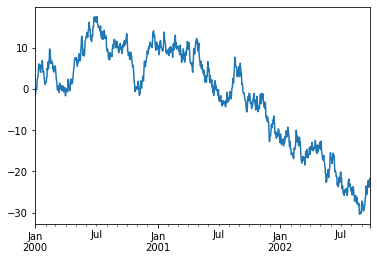

In [143]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

DataFrame 的 plot() (opens new window)方法可以快速绘制所有带标签的列：

<Figure size 432x288 with 0 Axes>

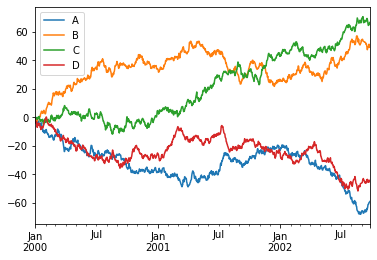

In [148]:
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# 数据输入 / 输出
## CSV

In [149]:
df.to_csv('foo.csv')

In [150]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.436911,-1.848325,-0.661770,-1.067038
1,2000-01-02,0.125325,-0.710450,-0.419162,-2.426966
2,2000-01-03,-2.119747,-0.567196,-0.718607,-3.580715
3,2000-01-04,-3.346678,-0.685736,-0.612863,-4.185802
4,2000-01-05,-3.980451,-2.326814,-0.011252,-3.056684
...,...,...,...,...,...
995,2002-09-22,-60.770811,49.513616,64.669827,-45.415626
996,2002-09-23,-59.825441,51.439289,65.932100,-43.926201
997,2002-09-24,-59.499389,50.015335,65.754694,-45.092690
998,2002-09-25,-59.211550,49.180247,66.798486,-44.797384


## HDF5

In [151]:
df.to_hdf('foo.h5', 'df')

In [152]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.436911,-1.848325,-0.661770,-1.067038
2000-01-02,0.125325,-0.710450,-0.419162,-2.426966
2000-01-03,-2.119747,-0.567196,-0.718607,-3.580715
2000-01-04,-3.346678,-0.685736,-0.612863,-4.185802
2000-01-05,-3.980451,-2.326814,-0.011252,-3.056684
...,...,...,...,...
2002-09-22,-60.770811,49.513616,64.669827,-45.415626
2002-09-23,-59.825441,51.439289,65.932100,-43.926201
2002-09-24,-59.499389,50.015335,65.754694,-45.092690
2002-09-25,-59.211550,49.180247,66.798486,-44.797384


## Excel

In [153]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [154]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.436911,-1.848325,-0.661770,-1.067038
1,2000-01-02,0.125325,-0.710450,-0.419162,-2.426966
2,2000-01-03,-2.119747,-0.567196,-0.718607,-3.580715
3,2000-01-04,-3.346678,-0.685736,-0.612863,-4.185802
4,2000-01-05,-3.980451,-2.326814,-0.011252,-3.056684
...,...,...,...,...,...
995,2002-09-22,-60.770811,49.513616,64.669827,-45.415626
996,2002-09-23,-59.825441,51.439289,65.932100,-43.926201
997,2002-09-24,-59.499389,50.015335,65.754694,-45.092690
998,2002-09-25,-59.211550,49.180247,66.798486,-44.797384
